In [109]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time

In [402]:
pd.set_option('display.max_columns', 999)

In [2]:
columns = ["Time",
"Temp",
"Wind",
"Date",
"Location",
"RowType"#scull/sweep,
"NumberRowers",
"BoatName",
"RowerNames",
"RegattaName",
"CoxswainName",
"Level",
"AgeGroup",
"First", #(1st/2nd/3rd/4th/5th/6th/7th, etc)
"Semi", #(1st/2nd/3rd/4th...)
"Final" #A,B, or C decided from above (1st/2nd/3rd...etc)
          ]

In [518]:
df = pd.read_excel('../data/rowers.xls')

In [519]:
df.head()

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime
0,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Eight,NaN,Star,0.0,Star,0.0,Anna,1.0,Chloe,1.0,Indigo,1.0,Star,0.0,Star,0.0,Star,0.0,Bcustodio,NaN,1.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Quad,NaN,Maia,1.0,Star,0.0,Nikki,1.0,Star,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Lchapman,NaN,1.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Four,NaN,Maia,0.0,Indigo,0.0,Nikki,0.0,Anna,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Chloe,DNS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
df['TimeConverted'] = df['Time']

In [521]:
df['TimeConverted'].fillna(value=0,inplace=True)
df['TimeConverted'].replace({'DNS':0, 'Cancelled':0, 'Scratched':0, 'NTT':0}, inplace=True)

In [417]:
def convert_zero_time(zero):
    if zero == 0:
        return(pd.to_datetime(str(zero), format='%H').time())
    return(zero)

In [418]:
def convert_to_seconds(time):
    if time.microsecond > 0:
        seconds = float(time.second + (10000/time.microsecond))
    else:
        seconds = float(time.second)
    print(seconds)
    seconds += float(time.minute * 60)
    print(seconds)
    return( seconds )
    

In [522]:
df['TimeConverted'] = df['TimeConverted'].apply(convert_zero_time)

In [523]:
df['TimeConverted'][0]

datetime.time(0, 0)

In [532]:
df['TimeSeconds'] = df['TimeConverted'].apply(convert_to_seconds)

0.0
0.0
0.0
0.0
6.1
546.1
30.1
570.1
0.0
0.0
46.1
586.1
14.0125
554.0125
52.05
592.05
58.01162790697674
598.0116279069767
36.01075268817204
576.010752688172
35.016666666666666
635.0166666666667
24.0
624.0
22.015384615384615
562.0153846153846
31.014285714285716
631.0142857142857
58.0
598.0
26.020833333333332
566.0208333333334
11.028571428571428
551.0285714285715
21.027027027027028
621.027027027027
55.013333333333335
595.0133333333333
14.019607843137255
674.0196078431372
40.013333333333335
520.0133333333333
15.012345679012345
735.0123456790124
31.0
571.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.01639344262295
613.016393442623
17.011363636363637
677.0113636363636
47.01639344262295
587.016393442623
16.013157894736842
616.0131578947369
17.011111111111113
557.0111111111111
10.5
490.5
32.03225806451613
632.0322580645161
0.0
0.0


In [533]:
df.head()

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,crew,CombinedNumberRows,TimeSeconds
0,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Eight,NaN,Star,0.0,Star,0.0,Anna,1.0,Chloe,1.0,Indigo,1.0,Star,0.0,Star,0.0,Star,0.0,Bcustodio,NaN,1.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,00:00:00,Star Star Anna ChloeIndigoStarStarStar,3.0,0.0
1,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Quad,NaN,Maia,1.0,Star,0.0,Nikki,1.0,Star,0.0,,0.0,,0.0,,0.0,,0.0,Lchapman,NaN,1.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN,2.0,0.0
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:06.100000,Star Star Star NikkiStarIndigoChloeAnna,4.0,546.1
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:30.100000,NaN,7.0,570.1
4,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Four,NaN,Maia,0.0,Indigo,0.0,Nikki,0.0,Anna,0.0,,0.0,,0.0,,0.0,,0.0,Chloe,DNS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN,0.0,0.0


In [526]:
df_whole = df

In [534]:
df = df.query('(TimeSeconds > 0)')

In [528]:
df['CombinedNumberRows'] = df['Rower1RowNumber'] + df['Rower2RowNumber'] + df['Rower3RowNumber'] + df['Rower4RowNumber'] + df['Rower5RowNumber'] + df['Rower6RowNumber'] + df['Rower7RowNumber'] + df['Rower8RowNumber']

In [529]:
df.head()

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,crew,CombinedNumberRows
0,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Eight,NaN,Star,0.0,Star,0.0,Anna,1.0,Chloe,1.0,Indigo,1.0,Star,0.0,Star,0.0,Star,0.0,Bcustodio,NaN,1.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,00:00:00,Star Star Anna ChloeIndigoStarStarStar,3.0
1,"October 19, 2019",Queens Cup,Novice,Womens50,Sweep,Quad,NaN,Maia,1.0,Star,0.0,Nikki,1.0,Star,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Lchapman,NaN,1.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN,2.0
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:06.100000,Star Star Star NikkiStarIndigoChloeAnna,4.0
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:30.100000,NaN,7.0
4,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Four,NaN,Maia,0.0,Indigo,0.0,Nikki,0.0,Anna,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,Chloe,DNS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,NaN,0.0


In [531]:
def fill_blank_rowers(df, row):
    return (df[row].fillna(''))

In [535]:
rower_columns = ['Rower1', 'Rower2', 'Rower3', 'Rower4', 'Rower5','Rower6','Rower7','Rower8']
for column in rower_columns:
    df[column] = fill_blank_rowers(df,column)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [538]:
df['crew'] = df['Rower1'] + ' '+ df['Rower2'] + ' ' + df['Rower3'] + ' ' + df['Rower4'] + df['Rower5'] + df['Rower6'] + df['Rower7'] + df['Rower8']

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [545]:
indigo = df.query('(Rower1 == "Indigo") or (Rower2 == "Indigo") or (Rower3 == "Indigo") or (Rower4 == "Indigo") or (Rower5 == "Indigo") or (Rower6 == "Indigo") or (Rower7 == "Indigo") or (Rower8 == "Indigo")')
chloe = df.query('(Rower1 == "Chloe") or (Rower2 == "Chloe") or (Rower3 == "Chloe") or (Rower4 == "Chloe") or (Rower5 == "Chloe") or (Rower6 == "Chloe") or (Rower7 == "Chloe") or (Rower8 == "Chloe")')
anna = df.query('(Rower1 == "Anna") or (Rower2 == "Anna") or (Rower3 == "Anna") or (Rower4 == "Anna") or (Rower5 == "Anna") or (Rower6 == "Anna") or (Rower7 == "Anna") or (Rower8 == "Anna")')
maia = df.query('(Rower1 == "Maia") or (Rower2 == "Maia") or (Rower3 == "Maia") or (Rower4 == "Maia") or (Rower5 == "Maia") or (Rower6 == "Maia") or (Rower7 == "Maia") or (Rower8 == "Maia")')
nikki = df.query('(Rower1 == "Nikki") or (Rower2 == "Nikki") or (Rower3 == "Nikki") or (Rower4 == "Nikki") or (Rower5 == "Nikki") or (Rower6 == "Nikki") or (Rower7 == "Nikki") or (Rower8 == "Nikki")')
ella = df.query('(Rower1 == "Ella") or (Rower2 == "Ella") or (Rower3 == "Ella") or (Rower4 == "Ella") or (Rower5 == "Ella") or (Rower6 == "Ella") or (Rower7 == "Ella") or (Rower8 == "Ella")')

In [546]:
indigo.head()

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,crew,CombinedNumberRows,TimeSeconds,xlabel
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:06.100000,Star Star Star NikkiStarIndigoChloeAnna,4.0,546.1000,Eight Novice
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:30.100000,Maia Indigo Chloe Anna,7.0,570.1000,Quad Novice
5,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Eight,NaN,Anna,1.0,Maia,1.0,Nikki,1.0,Star,0.0,Indigo,1.0,Star,0.0,Chloe,1.0,Star,0.0,Adam,00:09:46.100000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:46.100000,Anna Maia Nikki StarIndigoStarChloeStar,5.0,586.1000,Eight Novice
6,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Four,NaN,Nikki,2.0,Maia,3.0,Indigo,3.0,Chloe,3.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:14.800000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:14.800000,Nikki Maia Indigo Chloe,11.0,554.0125,Four Novice
7,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sculls,Quad,NaN,Maia,2.0,Anna,2.0,Indigo,2.0,Chloe,2.0,,0.0,,0.0,,0.0,,0.0,Ben,00:09:52.200000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:52.200000,Maia Anna Indigo Chloe,8.0,592.0500,Quad Novice


In [267]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import colormaps
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 15]

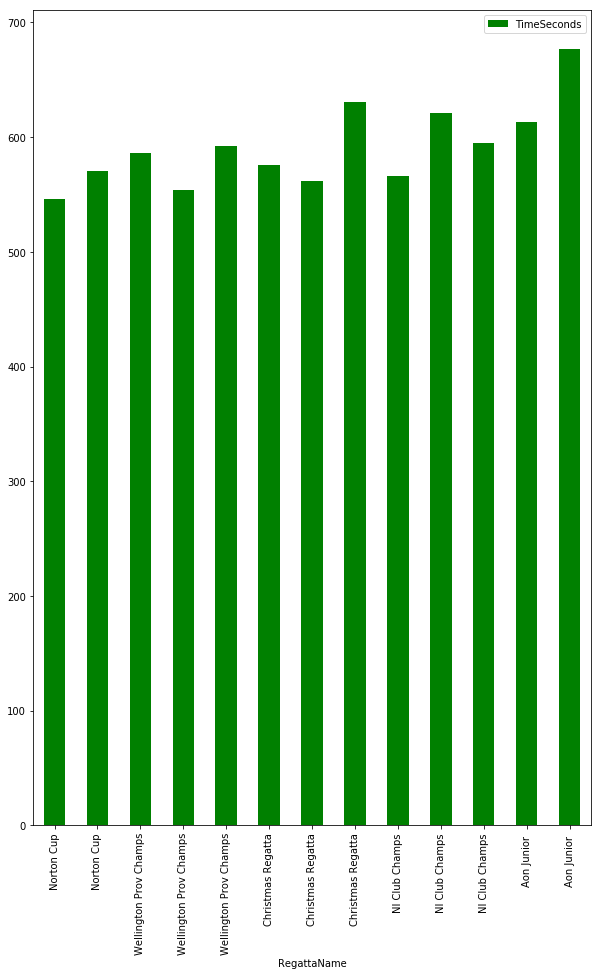

In [395]:
indigo.plot(x='RegattaName',y='TimeSeconds', kind='bar',rot=90,colormap='ocean')

In [365]:
df.columns

Index(['Date', 'RegattaName', 'Level', 'AgeGroup', 'RowType', 'NumberType',
       'BoatName', 'Rower1', 'Rower1RowNumber', 'Rower2', 'Rower2RowNumber',
       'Rower3', 'Rower3RowNumber', 'Rower4', 'Rower4RowNumber', 'Rower5',
       'Rower5RowNumber', 'Rower6', 'Rower6RowNumber', 'Rower7',
       'Rower7RowNumber', 'Rower8', 'Rower8RowNumber', 'Coxswain', 'Time',
       'Heat', 'Place', 'Semi', 'SemiTime', 'FinalA', 'FinalATime', 'FinalB',
       'FinalBTime', 'FinalC', 'FinalCTime', 'TimeConverted', 'TimeSeconds',
       'CombinedNumberRows', 'xlabel'],
      dtype='object')

In [541]:
#create labels for the graphs based on what you want to compare
def create_xlabel(df, column1='', column2=''):
    df['xlabel2'] = df['xlabel'] + df['crew'] + ' '+ df[column1] + ' ' + df[column2]
    return(df)

In [542]:
def type_level_label(df):
    df['xlabel'] = df['NumberType'] + ' ' + df['Level']
    return(df)

In [544]:
df = type_level_label(df)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [582]:
means = df.groupby(by=['NumberType'])['TimeSeconds'].mean()

In [583]:
mean_df = pd.DataFrame(means.values, index=means.index, columns=['TimeSecondMean'])

In [584]:
mean_df

,TimeSecondMean
NumberType,
Double,584.510870
Eight,566.100000
Four,597.417036
Quad,581.366330
Single,680.354737


In [585]:
df.head()

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,crew,CombinedNumberRows,TimeSeconds,xlabel
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:06.100000,Star Star Star NikkiStarIndigoChloeAnna,4.0,546.1000,Eight Novice
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:30.100000,Maia Indigo Chloe Anna,7.0,570.1000,Quad Novice
5,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Eight,NaN,Anna,1.0,Maia,1.0,Nikki,1.0,Star,0.0,Indigo,1.0,Star,0.0,Chloe,1.0,Star,0.0,Adam,00:09:46.100000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:46.100000,Anna Maia Nikki StarIndigoStarChloeStar,5.0,586.1000,Eight Novice
6,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Four,NaN,Nikki,2.0,Maia,3.0,Indigo,3.0,Chloe,3.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:14.800000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:14.800000,Nikki Maia Indigo Chloe,11.0,554.0125,Four Novice
7,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sculls,Quad,NaN,Maia,2.0,Anna,2.0,Indigo,2.0,Chloe,2.0,,0.0,,0.0,,0.0,,0.0,Ben,00:09:52.200000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:52.200000,Maia Anna Indigo Chloe,8.0,592.0500,Quad Novice


In [586]:
added_mean = pd.merge(mean_df.reset_index(), df, on=['NumberType'])

In [587]:
added_mean

,NumberType,TimeSecondMean,Date,RegattaName,Level,AgeGroup,RowType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,crew,CombinedNumberRows,TimeSeconds,xlabel
0,Double,584.510870,"December 13, 2109",Christmas Regatta,Intermediate,Womens,Sculls,NaN,Ella,1.0,Nikki,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:58.860000,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:58.860000,Ella Nikki,2.0,598.011628,Double Intermediate
1,Double,584.510870,"December 13, 2109",Christmas Regatta,U15,Girls,Sculls,NaN,Anna,2.0,Maia,2.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:10:24,1.0,1.0,NaN,NaN,6.0,00:09:45.700000,NaN,NaN,NaN,NaN,00:10:24,Anna Maia,4.0,624.000000,Double U15
2,Double,584.510870,"December 13, 2109",Christmas Regatta,Novice,Womens,Sculls,NaN,Indigo,1.0,Chloe,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:22.650000,1.0,3.0,NaN,NaN,NaN,NaN,4.0,00:08:41.650000,NaN,NaN,00:09:22.650000,Indigo Chloe,2.0,562.015385,Double Novice
3,Double,584.510870,"January 24, 2020",NI Club Champs,Novice,Womens,Sculls,NaN,Nikki,1.0,Ella,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:58,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:58,Nikki Ella,2.0,598.000000,Double Novice
4,Double,584.510870,"January 24, 2020",NI Club Champs,U16,Girls,Sculls,NaN,Ella,3.0,Indigo,3.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:10:21.370000,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:10:21.370000,Ella Indigo,6.0,621.027027,Double U16
5,Double,584.510870,"January 24, 2020",NI Club Champs,Intermediate,Womens,Sculls,NaN,Chloe,1.0,Indigo,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:55.750000,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:55.750000,Chloe Indigo,2.0,595.013333,Double Intermediate
6,Double,584.510870,"January 24, 2020",NI Club Champs,Novice,Womens,Sculls,NaN,Anna,1.0,Maia,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:08:40.750000,5.0,2.0,7.0,00:08:59.610000,NaN,NaN,3.0,00:08:42.550000,NaN,NaN,00:08:40.750000,Anna Maia,2.0,520.013333,Double Novice
7,Double,584.510870,"February 29, 2020",Aon Junior,U16,Girls,Sculls,NaN,Anna,3.0,Indigo,2.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:11:17.880000,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:11:17.880000,Anna Indigo,5.0,677.011364,Double U16
8,Double,584.510870,"February 29, 2020",Aon Junior,U18,Girls,Sculls,NaN,Chloe,2.0,Nikki,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:47.610000,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:47.610000,Chloe Nikki,3.0,587.016393,Double U18
9,Double,584.510870,"February 29, 2020",Aon Junior,U15,Girls,Sculls,NaN,Anna,1.0,Maia,2.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:17.900000,4.0,1.0,NaN,NaN,6.0,00:08:55.300000,NaN,NaN,NaN,NaN,00:09:17.900000,Anna Maia,3.0,557.011111,Double U15


In [447]:
#Indigo
indigoSort = indigo.sort_values(by=['NumberType','Level','TimeSeconds'])
indigoSort = type_level_label(indigoSort)
indigoSort = create_xlabel(indigoSort)
#Ella
ellaSort = ella.sort_values(by=['NumberType','Level','TimeSeconds'])
ellaSort = type_level_label(ellaSort)
ellaSort = create_xlabel(ellaSort)
#Chloe
chloeSort = chloe.sort_values(by=['NumberType','Level','TimeSeconds'])
chloeSort = type_level_label(chloeSort)
chloeSort = create_xlabel(chloeSort)
#nikki
nikkiSort = nikki.sort_values(by=['NumberType','Level','TimeSeconds'])
nikkiSort = type_level_label(nikkiSort)
nikkiSort = create_xlabel(nikkiSort)
#anna
annaSort = anna.sort_values(by=['NumberType','Level','TimeSeconds'])
annaSort = type_level_label(annaSort)
annaSort = create_xlabel(annaSort)
#maia
maiaSort = maia.sort_values(by=['NumberType','Level','TimeSeconds'])
maiaSort = type_level_label(maiaSort)
maiaSort = create_xlabel(maiaSor)


# indigoSortPosition2 = indigo.sort_values(by=['NumberType','Level','Rower2'])
# indigoSortPosition2 = create_xlabel(indigoSortPosition2,'Rower')

# indigoSortPosition3 = indigo.sort_values(by=['NumberType','Level','Rower3'])
# indigoSortPosition3 = create_xlabel(indigoSortPosition3,'Rower')

# indigoSortPosition4 = indigo.sort_values(by=['NumberType','Level','Rower4'])
# indigoSortPosition4 = create_xlabel(indigoSortPosition4,'Rower')


In [448]:
indigoSortPosition1

,Date,RegattaName,Level,AgeGroup,RowType,NumberType,BoatName,Rower1,Rower1RowNumber,Rower2,Rower2RowNumber,Rower3,Rower3RowNumber,Rower4,Rower4RowNumber,Rower5,Rower5RowNumber,Rower6,Rower6RowNumber,Rower7,Rower7RowNumber,Rower8,Rower8RowNumber,Coxswain,Time,Heat,Place,Semi,SemiTime,FinalA,FinalATime,FinalB,FinalBTime,FinalC,FinalCTime,TimeConverted,TimeSeconds,CombinedNumberRows,xlabel,xlabel2
18,"January 24, 2020",NI Club Champs,Intermediate,Womens,Sculls,Double,NaN,Chloe,1.0,Indigo,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:55.750000,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:55.750000,595.013333,2.0,Double Intermediate,Double Intermediate 1Chloe2Indigo34
12,"December 13, 2109",Christmas Regatta,Novice,Womens,Sculls,Double,NaN,Indigo,1.0,Chloe,1.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:09:22.650000,1.0,3.0,NaN,NaN,NaN,NaN,4.0,00:08:41.650000,NaN,NaN,00:09:22.650000,562.015385,2.0,Double Novice,Double Novice 1Indigo2Chloe34
30,"February 29, 2020",Aon Junior,U16,Girls,Sculls,Double,NaN,Anna,3.0,Indigo,2.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:11:17.880000,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:11:17.880000,677.011364,5.0,Double U16,Double U16 1Anna2Indigo34
17,"January 24, 2020",NI Club Champs,U16,Girls,Sculls,Double,NaN,Ella,3.0,Indigo,3.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,NaN,00:10:21.370000,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:10:21.370000,621.027027,6.0,Double U16,Double U16 1Ella2Indigo34
5,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Eight,NaN,Anna,1.0,Maia,1.0,Nikki,1.0,Star,0.0,Indigo,1.0,Star,0.0,Chloe,1.0,Star,0.0,Adam,00:09:46.100000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:46.100000,586.100000,5.0,Eight Novice,Eight Novice 1Anna2Maia3Nikki4Star
2,"November 2, 2019",Norton Cup,Novice,Womens,Sweep,Eight,NaN,Star,0.0,Star,0.0,Star,0.0,Nikki,1.0,Star,0.0,Indigo,1.0,Chloe,1.0,Anna,1.0,Maia,00:09:06.100000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:06.100000,546.100000,4.0,Eight Novice,Eight Novice 1Star2Star3Star4Nikki
6,"November 23, 2019",Wellington Prov Champs,Novice,Womens,Sweep,Four,NaN,Nikki,2.0,Maia,3.0,Indigo,3.0,Chloe,3.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:14.800000,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:14.800000,554.012500,11.0,Four Novice,Four Novice 1Nikki2Maia3Indigo4Chloe
13,"December 13, 2109",Christmas Regatta,Novice,Womens,Sweep,Four,NaN,Star,0.0,Star,0.0,Star,0.0,Indigo,3.0,,0.0,,0.0,,0.0,,0.0,Delliot,00:10:31.700000,1.0,3.0,NaN,NaN,NaN,NaN,8.0,00:10:28.660000,NaN,NaN,00:10:31.700000,631.014286,3.0,Four Novice,Four Novice 1Star2Star3Star4Indigo
9,"December 13, 2109",Christmas Regatta,Novice,Womens,Sculls,Quad,NaN,Anna,1.0,Ella,2.0,Maia,1.0,Indigo,1.0,,0.0,,0.0,,0.0,,0.0,Ben,00:09:36.930000,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:36.930000,576.010753,5.0,Quad Novice,Quad Novice 1Anna2Ella3Maia4Indigo
3,"November 2, 2019",Norton Cup,Novice,Womens,Sculls,Quad,NaN,Maia,1.0,Indigo,2.0,Chloe,2.0,Anna,2.0,,0.0,,0.0,,0.0,,0.0,Adam,00:09:30.100000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:09:30.100000,570.100000,7.0,Quad Novice,Quad Novice 1Maia2Indigo3Chloe4Anna


/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10_r colormap was deprecated in version 2.0. Use tab10_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


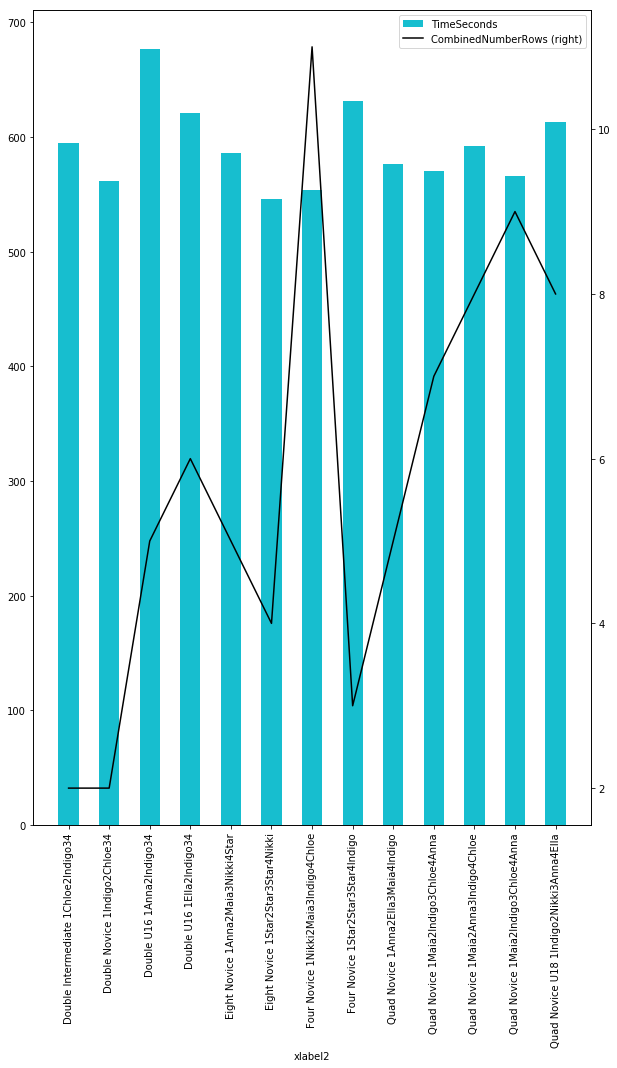

In [450]:
fig, ax = plt.subplots()
xlabel = indigoSortPosition1['xlabel2'].values
indigoSortPosition1.plot(x='xlabel2', y='TimeSeconds', ax=ax, kind='bar',colormap='Vega10_r',rot=90)
indigoSortPosition1.plot(x='xlabel2', y='CombinedNumberRows', ax=ax, secondary_y=True, colors='black',rot=90)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10_r colormap was deprecated in version 2.0. Use tab10_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


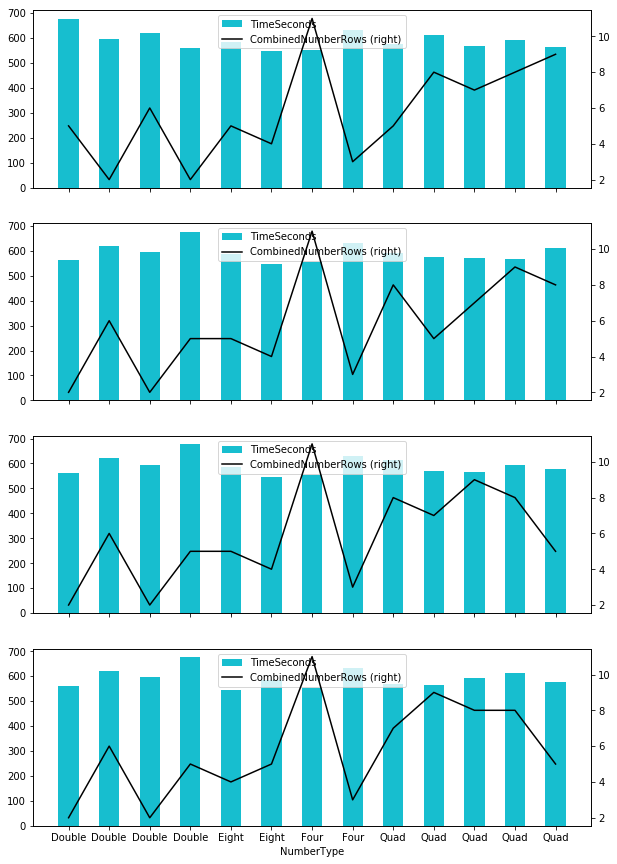

In [334]:
fig, ax = plt.subplots(4)

indigoSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[0], kind='bar',colormap='Vega10_r')
indigoSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[0], secondary_y=True, colors='black')

indigoSortPosition2.plot(x='NumberType', y='TimeSeconds', ax=ax[1], kind='bar',colormap='Vega10_r')
indigoSortPosition2.plot(x='NumberType', y='CombinedNumberRows', ax=ax[1], secondary_y=True, colors='black')

indigoSortPosition3.plot(x='NumberType', y='TimeSeconds', ax=ax[2], kind='bar',colormap='Vega10_r')
indigoSortPosition3.plot(x='NumberType', y='CombinedNumberRows', ax=ax[2], secondary_y=True, colors='black')

indigoSortPosition4.plot(x='NumberType', y='TimeSeconds', ax=ax[3], kind='bar',colormap='Vega10_r')
indigoSortPosition4.plot(x='NumberType', y='CombinedNumberRows', ax=ax[3], secondary_y=True, colors='black')



In [483]:
list(maiaSortPosition1['xlabel2'].values)

['Double Novice 1Anna2Maia34',
 'Double Novice U18 1Maia2Ella34',
 'Double U15 1Anna2Maia34',
 'Double U15 1Anna2Maia34',
 'Eight Novice 1Anna2Maia3Nikki4Star',
 'Four Novice 1Anna2Nikki3Ella4Maia',
 'Four Novice 1Maia2Ella3Nikki4Anna',
 'Four Novice 1Nikki2Maia3Indigo4Chloe',
 'Four Novice U18 1Ella2Chloe3Nikki4Maia',
 'Quad Novice 1Anna2Ella3Maia4Indigo',
 'Quad Novice 1Maia2Indigo3Chloe4Anna',
 'Quad Novice 1Maia2Anna3Indigo4Chloe',
 'Quad Novice 1Maia2Indigo3Chloe4Anna',
 'Quad Novice U18 1Maia2Nikki3Ella4Chloe']

In [497]:
list(range(0,700,20))

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680]

In [507]:
#fig, ax = plt.subplots(6)
rower_list = [indigoSortPosition1,chloeSortPosition1,ellaSortPosition1,annaSortPosition1,nikkiSortPosition1,maiaSortPosition1]
rowers = ['indigo','chloe','ella','anna','nikki','maia']

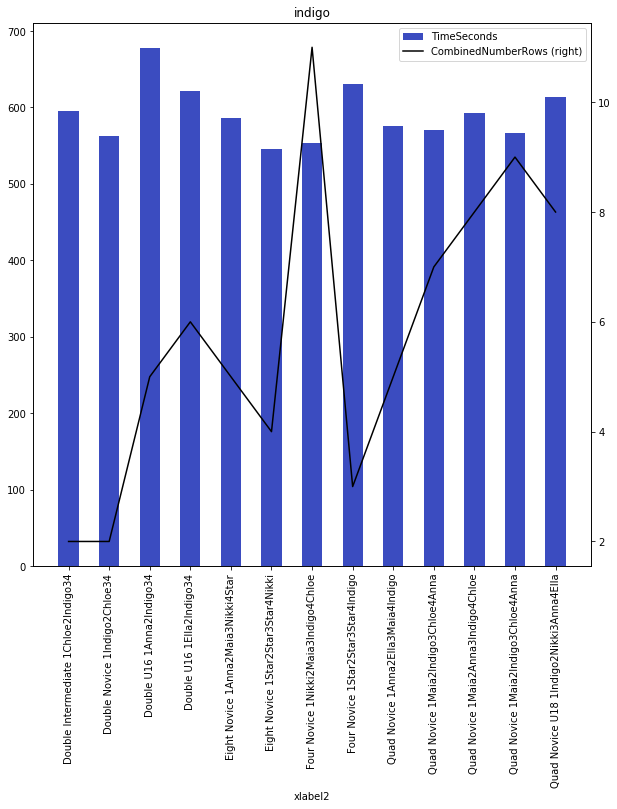

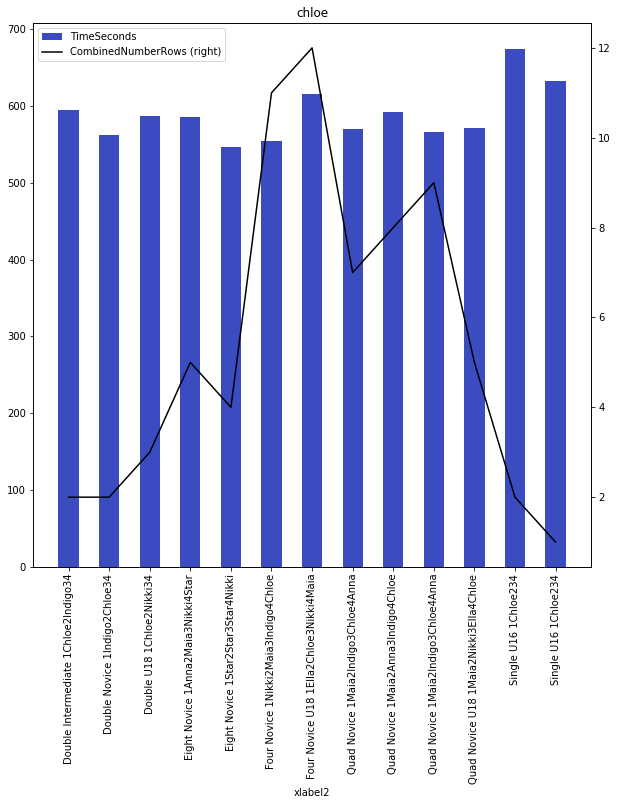

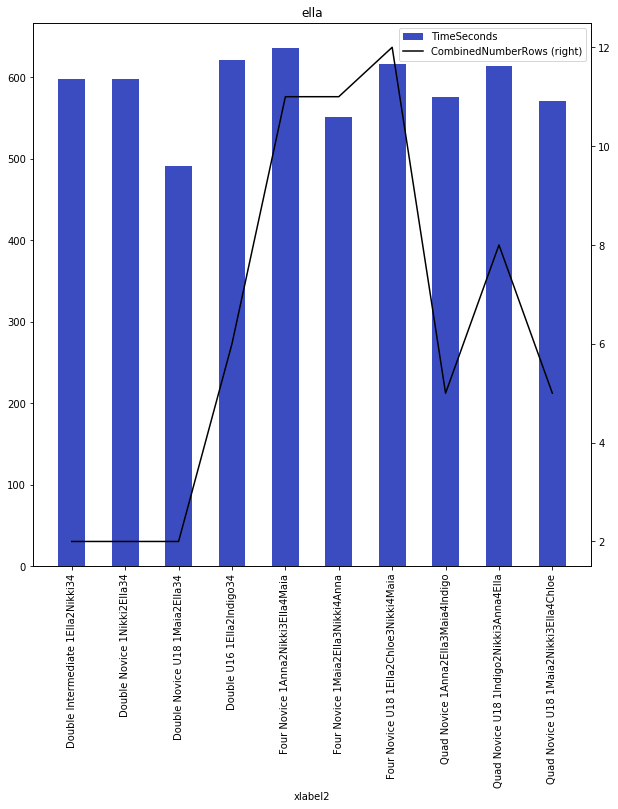

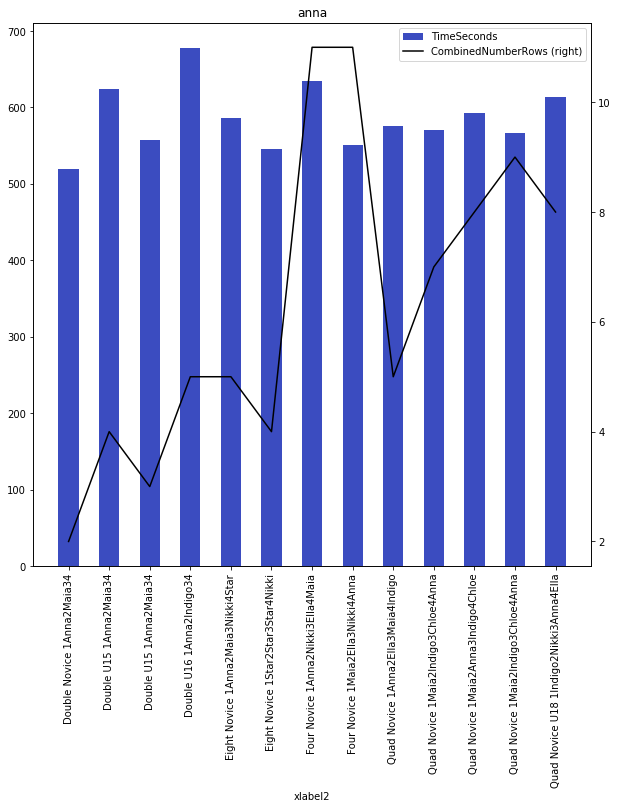

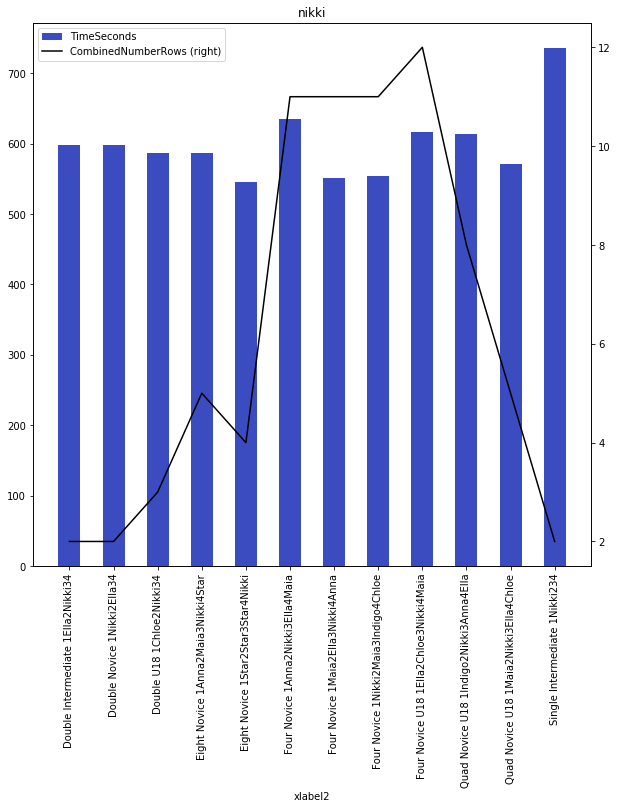

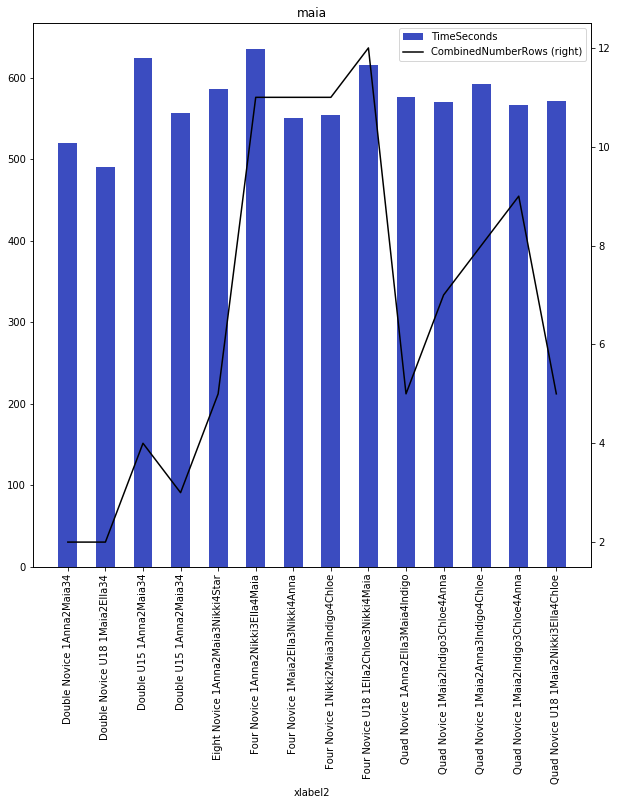

In [515]:
#fig, axs = plt.subplots(6, sharex=False, sharey=False)

for i, df in enumerate(rower_list):
    _, ax = plt.subplots()
    rower = rowers[i]

#     ax = axs[i]
#     xtickLabels = list(df['xlabel2'].values)
#     ax.set_xticklabels(xtickLabels, rotation=90)
    df.plot(x='xlabel2', y='TimeSeconds', kind='bar',rot=90, ax=ax, colormap='coolwarm', figsize=(10,10))
    df.plot(x='xlabel2', y='CombinedNumberRows', rot=90, ax=ax, secondary_y=True, color='black',title=rowers[i])
    fig.savefig(f'../data/{rower}.png')
    


#   axes[c].plot(x, y)
#   axes[c].set_title('cats')


# chloeSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[1], kind='bar',colormap='autumn', figsize=(20,20),sharex=False)
# chloeSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[1], secondary_y=True, colors='black',figsize=(20,20),sharex=False)

# nikkiSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[2], kind='bar',colormap='winter', figsize=(20,20),sharex=False)
# nikkiSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[2], secondary_y=True, colors='black',sharex=False)

# ellaSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[3], kind='bar',colormap='spring', figsize=(20,20),sharex=False)
# ellaSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[3], secondary_y=True, colors='black', sharex=False)

# annaSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[4], kind='bar',colormap='cool', figsize=(20,20),sharex=False)
# annaSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[4], secondary_y=True, colors='black', sharex=False)

# maiaSortPosition1.plot(x='NumberType', y='TimeSeconds', ax=ax[5], kind='bar',colormap='Wistia', figsize=(20,20),sharex=False)
# maiaSortPosition1.plot(x='NumberType', y='CombinedNumberRows', ax=ax[5], secondary_y=True, colors='black', sharex=False)

In [588]:
added_mean.to_csv('../data/combinedGraph.csv',index=False)

In [ ]:
indigo = df.query('(Rower1 == "Indigo") or (Rower2 == "Indigo") or (Rower3 == "Indigo") or (Rower4 == "Indigo") or (Rower5 == "Indigo") or (Rower6 == "Indigo") or (Rower7 == "Indigo") or (Rower8 == "Indigo")')
chloe = df.query('(Rower1 == "Chloe") or (Rower2 == "Chloe") or (Rower3 == "Chloe") or (Rower4 == "Chloe") or (Rower5 == "Chloe") or (Rower6 == "Chloe") or (Rower7 == "Chloe") or (Rower8 == "Chloe")')
anna = df.query('(Rower1 == "Anna") or (Rower2 == "Anna") or (Rower3 == "Anna") or (Rower4 == "Anna") or (Rower5 == "Anna") or (Rower6 == "Anna") or (Rower7 == "Anna") or (Rower8 == "Anna")')
maia = df.query('(Rower1 == "Maia") or (Rower2 == "Maia") or (Rower3 == "Maia") or (Rower4 == "Maia") or (Rower5 == "Maia") or (Rower6 == "Maia") or (Rower7 == "Maia") or (Rower8 == "Maia")')
nikki = df.query('(Rower1 == "Nikki") or (Rower2 == "Nikki") or (Rower3 == "Nikki") or (Rower4 == "Nikki") or (Rower5 == "Nikki") or (Rower6 == "Nikki") or (Rower7 == "Nikki") or (Rower8 == "Nikki")')
ella = df.query('(Rower1 == "Ella") or (Rower2 == "Ella") or (Rower3 == "Ella") or (Rower4 == "Ella") or (Rower5 == "Ella") or (Rower6 == "Ella") or (Rower7 == "Ella") or (Rower8 == "Ella")')